# User Analytics in the Telecommunication Industry

The investor is interested in purchasing TellCo, an existing mobile service provider in the Republic of Pefkakia.  TellCo’s current owners have been willing to share their financial information but have never employed anyone to look at their data that is generated automatically by their systems.
This Project is to provide a report to analyse opportunities for growth and make a recommendation on whether TellCo is worth buying or selling. 

In [1]:
# System Modules
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Module imports
import pandas as pd
pd.set_option('max_column', None)
pd.options.display.float_format = "{:.2f}".format

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import pickle

In [3]:
# My Custom Modules Importing
from scripts import file
from scripts import marketing
from scripts import ploting

In [4]:
#Read the cleaned csv file and store it on data
file_name = 'clean_telecommunication_data.csv'
data = file.read_csv(file_name)

In [5]:
###################################PLOTTING FUNCTIONS###################################

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def format_float(value):
    return f'{value:,.2f}'

def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(),df[column])
    
    return df[column]


pd.options.display.float_format = format_float

# Task 1 - User Overview analysis

Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. This section will familiarise oneself with the data and explore initial insights that will inform further steps in the data science process. The goal is to understand the dataset, identify the missing values & outliers if any using visual and quantitative methods to get a sense of the story it tells. 

## Market Analysis

In this section, user overview analysis is performed using telecom data set. To achieve the task following sub-tasks will be done.
1. Start by identifying the top 10 handsets used by the customers.
2. Then, identify the top 3 handset manufacturers
3. Next, identify the top 5 handsets per top 3 handset manufacturer
4. Make a short interpretation and recommendation to marketing teams



In [6]:
marketing_df = marketing.Marketing(data)
marketing_df.filter_necessary_columns()
marketing_df.df.head()

,MSISDN/Number,Handset Type,Handset Manufacturer
0,"33,664,962,239.00",Samsung Galaxy A5 Sm-A520F,Samsung
1,"33,681,854,413.00",Samsung Galaxy J5 (Sm-J530),Samsung
2,"33,760,627,129.00",Samsung Galaxy A8 (2018),Samsung
3,"33,750,343,200.00",NaN,NaN
4,"33,699,795,932.00",Samsung Sm-G390F,Samsung


Top 10 handsets used by the customers

In [7]:
top_10_handsets =  marketing_df.get_top_handsets(10)
top_10_handsets

,Handset Type,MSISDN/Number
315,Huawei B528S-23A,19727
53,Apple iPhone 6S (A1688),9395
49,Apple iPhone 6 (A1586),8993
59,Apple iPhone 7 (A1778),6279
73,Apple iPhone Se (A1723),5165
66,Apple iPhone 8 (A1905),4977
78,Apple iPhone Xr (A2105),4556
951,Samsung Galaxy S8 (Sm-G950F),4464
75,Apple iPhone X (A1901),3806
834,Samsung Galaxy A5 Sm-A520F,3700


Top 3 handset manufacturers

In [8]:
top_3_manufacturers =  marketing_df.get_top_manufacturers(3)
top_3_manufacturers

,Handset Manufacturer,MSISDN/Number
5,Apple,59339
103,Samsung,40429
52,Huawei,34296


The top 5 handsets per top 3 handset manufacturer

In [9]:
best_phones = marketing_df.get_best_phones()

**** Apple ***
Handset Type
Apple iPhone 6S (A1688)    6744
Apple iPhone 6 (A1586)     6245
Apple iPhone 7 (A1778)     4675
Apple iPhone Se (A1723)    3744
Apple iPhone 8 (A1905)     3535
Name: MSISDN/Number, dtype: int64

**** Samsung ***
Handset Type
Samsung Galaxy S8 (Sm-G950F)    3232
Samsung Galaxy J5 (Sm-J530)     2741
Samsung Galaxy A5 Sm-A520F      2701
Samsung Galaxy J3 (Sm-J330)     2582
Samsung Galaxy S7 (Sm-G930X)    2288
Name: MSISDN/Number, dtype: int64

**** Huawei ***
Handset Type
Huawei B528S-23A                  10616
Huawei P20 Lite Huawei Nova 3E     1526
Huawei E5180                       1182
Huawei P20                         1105
Huawei Y6 2018                      757
Name: MSISDN/Number, dtype: int64



### Task 1.1 

Task 1.1 - Your employer wants to have an overview of the users’ behavior on some applications.

Aggregate per user the following information in the column  
1. number of xDR sessions
2. Session duration
3. the total download (DL) and upload (UL) data
4. the total data volume (in Bytes) during this session for each application

In [10]:
df_clean = data.copy()
aggregate = {"Bearer Id": 'count', 'Dur. (ms).1':'sum', 'Total UL (Bytes)': 'sum', 'Total DL (Bytes)': 'sum'}
aggregation_result = df_clean.groupby('MSISDN/Number').agg(aggregate)
aggregation_result.head()

,Bearer Id,Dur. (ms).1,Total UL (Bytes),Total DL (Bytes)
MSISDN/Number,,,,
"33,601,001,722.00",1,"116,720,140.00","36,053,108.00","842,637,466.00"
"33,601,001,754.00",1,"181,230,963.00","36,104,459.00","120,755,184.00"
"33,601,002,511.00",1,"134,969,374.00","39,306,820.00","556,659,663.00"
"33,601,007,832.00",1,"49,878,024.00","20,327,526.00","401,993,172.00"
"33,601,008,617.00",2,"37,104,453.00","94,280,527.00","1,363,130,417.00"


#### User beheviour ON Applications

In [11]:
# determind from this variables 
# Social Media, Google, Email, Youtube, Netflix, Gaming, Other . 
aggrigate = {
    'Total Social Media':'sum',
    'Total Google': 'sum', 
    'Total Youtube': 'sum', 
    'Total Netflix':'sum',
    'Total Gaming':'sum',
    'Total Other':'sum',
    'Total Email': 'sum',
    'Total':'sum'
}
user_app_usage = df_clean.copy()

user_app_usage["Total Google"]    = user_app_usage["Google DL (Bytes)"] + user_app_usage["Google UL (Bytes)"]
user_app_usage["Total Youtube"]   = user_app_usage["Youtube DL (Bytes)"] + user_app_usage["Youtube UL (Bytes)"]
user_app_usage["Total Netflix"]   = user_app_usage["Netflix DL (Bytes)"] + user_app_usage["Netflix UL (Bytes)"]
user_app_usage["Total Email"]     = user_app_usage["Email DL (Bytes)"] + user_app_usage["Email UL (Bytes)"]
user_app_usage["Total Gaming"]    = user_app_usage["Gaming DL (Bytes)"] + user_app_usage["Gaming UL (Bytes)"]
user_app_usage["Total Social Media"] = user_app_usage["Social Media DL (Bytes)"] + user_app_usage["Social Media UL (Bytes)"]
user_app_usage["Total Other"]     = user_app_usage["Other DL (Bytes)"] + user_app_usage["Other UL (Bytes)"]
user_app_usage["Total Email"]     = user_app_usage["Email UL (Bytes)"] + user_app_usage["Email DL (Bytes)"]
user_app_usage['Total']           = user_app_usage['Total UL (Bytes)'] + user_app_usage['Total DL (Bytes)']

# columns = ['Total Google', 'Total Youtube', 'Total Netflix', 'Total Email', 'Total Gaming', 'Total Social Media']
# for column in columns:
#     user_app_usage[column] = fix_outlier(user_app_usage, column)


user_behaviour = user_app_usage.groupby('MSISDN/Number').agg(aggrigate)
user_behaviour.info()


<class 'pandas.core.frame.DataFrame'>
Float64Index: 106471 entries, 33601001722.0 to 882397108489451.0
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Total Social Media  106471 non-null  float64
 1   Total Google        106471 non-null  float64
 2   Total Youtube       106471 non-null  float64
 3   Total Netflix       106471 non-null  float64
 4   Total Gaming        106471 non-null  float64
 5   Total Other         106471 non-null  float64
 6   Total Email         106471 non-null  float64
 7   Total               106471 non-null  float64
dtypes: float64(8)
memory usage: 7.3 MB


Total download (DL) and upload (UL) data of each application

In [12]:
user_app_usage = df_clean.copy()

user_app_usage["Total Google"]    = user_app_usage["Google DL (Bytes)"] + user_app_usage["Google UL (Bytes)"]
user_app_usage["Total Youtube"]   = user_app_usage["Youtube DL (Bytes)"] + user_app_usage["Youtube UL (Bytes)"]
user_app_usage["Total Netflix"]   = user_app_usage["Netflix DL (Bytes)"] + user_app_usage["Netflix UL (Bytes)"]
user_app_usage["Total Email"]     = user_app_usage["Email DL (Bytes)"] + user_app_usage["Email UL (Bytes)"]
user_app_usage["Total Gaming"]    = user_app_usage["Gaming DL (Bytes)"] + user_app_usage["Gaming UL (Bytes)"]
user_app_usage["Total Social Media"] = user_app_usage["Social Media DL (Bytes)"] + user_app_usage["Social Media UL (Bytes)"]
user_app_usage["Total Other"]     = user_app_usage["Other DL (Bytes)"] + user_app_usage["Other UL (Bytes)"]
user_app_usage['Total']           = user_app_usage['Total UL (Bytes)'] + user_app_usage['Total DL (Bytes)']

Non-Graphical Analysis of user behaviour on total data of each application

In [13]:
total_app_columns = ['MSISDN/Number','Total Google', 'Total Youtube', 'Total Netflix', 'Total Email', \
                     'Total Gaming', 'Total Social Media', 'Total Other', 'Total']
user_app_behaviour = user_app_usage[total_app_columns].groupby('MSISDN/Number').sum().sample(10)
user_app_behaviour

,Total Google,Total Youtube,Total Netflix,Total Email,Total Gaming,Total Social Media,Total Other,Total
MSISDN/Number,,,,,,,,
"33,669,799,467.00","12,271,371.00","31,834,752.00","24,541,437.00","1,974,665.00","582,355,894.00","1,365,755.00","96,383,435.00","661,834,225.00"
"33,623,420,657.00","17,355,948.00","34,256,148.00","22,360,144.00","6,626,982.00","1,025,681,330.00","2,687,541.00","846,486,221.00","1,129,208,645.00"
"33,679,703,596.00","1,169,251.00","21,664,997.00","41,684,837.00","898,784.00","280,990,783.00","2,490,603.00","712,062,117.00","357,681,836.00"
"33,665,155,790.00","22,734,113.00","41,665,906.00","53,017,613.00","3,506,075.00","653,113,791.00","4,830,021.00","472,285,738.00","797,257,066.00"
"33,652,889,187.00","2,664,393.00","20,236,264.00","31,877,949.00","3,006,994.00","539,968,340.00","3,569,043.00","395,877,589.00","613,402,083.00"
"33,603,207,226.00","24,002,464.00","57,381,721.00","22,047,782.00","4,870,278.00","484,311,987.00","1,144,540.00","624,807,395.00","609,289,617.00"
"33,761,565,438.00","9,044,723.00","14,120,669.00","31,267,811.00","4,264,075.00","219,401,715.00","996,486.00","342,274,065.00","291,893,150.00"
"33,644,018,961.00","12,571,112.00","13,623,600.00","23,502,771.00","2,141,227.00","578,248,307.00","744,625.00","793,251,297.00","641,927,819.00"
"33,658,044,793.00","7,082,272.00","11,367,969.00","24,164,010.00","1,284,607.00","70,313,358.00","596,454.00","639,881,877.00","118,033,918.00"


### Task 1.2

Identify and treat all missing values and outliers in the dataset by replacing by the mean of the corresponding column.

In [14]:
column_for_analysis = ['Bearer Id','Dur. (ms).1' ,'MSISDN/Number','Total Google', 'Total Youtube', \
                       'Total Netflix', 'Total Email', 'Total Gaming', 'Total Social Media', 'Total Other', 'Total']

user_app_behaviour = user_app_usage[column_for_analysis]

All  relevant variables/columns and associated data types

In [15]:
user_app_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148506 entries, 0 to 148505
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Bearer Id           148506 non-null  float64
 1   Dur. (ms).1         148506 non-null  float64
 2   MSISDN/Number       148506 non-null  float64
 3   Total Google        148506 non-null  float64
 4   Total Youtube       148506 non-null  float64
 5   Total Netflix       148506 non-null  float64
 6   Total Email         148506 non-null  float64
 7   Total Gaming        148506 non-null  float64
 8   Total Social Media  148506 non-null  float64
 9   Total Other         148506 non-null  float64
 10  Total               148506 non-null  float64
dtypes: float64(11)
memory usage: 12.5 MB


Analyze the basic metrics (mean, median, etc) in the Dataset

In [16]:
user_app_behaviour.describe()

,Bearer Id,Dur. (ms).1,MSISDN/Number,Total Google,Total Youtube,Total Netflix,Total Email,Total Gaming,Total Social Media,Total Other,Total
count,"148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00"
mean,"10,146,757,650,164,633,600.00","105,084,600.60","41,906,541,782.21","7,808,062.88","22,642,436.13","22,629,144.08","2,259,188.18","430,353,822.28","1,828,066.19","429,415,150.40","495,783,404.80"
std,"2,893,261,633,271,239,168.00","81,072,729.72","2,450,975,846,357.31","3,516,724.32","9,247,683.87","9,260,476.58","1,071,151.94","244,056,892.01","1,035,637.84","243,228,409.16","244,414,630.77"
min,"6,917,537,518,543,529,984.00","7,142,988.00","33,601,001,722.00","40,330.00","78,903.00","98,432.00","8,359.00","306,358.00","1,563.00","149,045.00","28,956,107.00"
25%,"7,349,883,247,462,785,024.00","58,249,644.50","33,651,311,444.25","4,944,994.00","15,993,736.00","15,980,157.50","1,359,336.25","218,736,240.50","932,182.75","218,668,175.00","284,528,559.25"
50%,"7,349,883,264,172,940,288.00","86,399,986.00","33,663,708,556.00","7,815,669.00","22,661,313.50","22,636,325.00","2,264,186.00","431,658,476.50","1,825,931.00","430,043,829.50","496,922,522.00"
75%,"13,042,425,978,973,898,752.00","132,933,303.50","33,683,515,176.75","10,683,066.25","29,298,239.75","29,288,322.00","3,160,024.50","641,528,161.50","2,727,493.00","639,895,974.50","706,567,698.50"
max,"13,186,541,167,134,199,808.00","1,859,336,442.00","882,397,108,489,451.00","15,528,782.00","45,190,078.00","45,198,153.00","4,518,036.00","859,202,784.00","3,650,861.00","859,520,934.00","955,984,776.00"


#### Graphical Analysis

Graphical Univariate Analysis by identifying the most suitable plotting options for each variable

<Figure size 648x504 with 0 Axes>

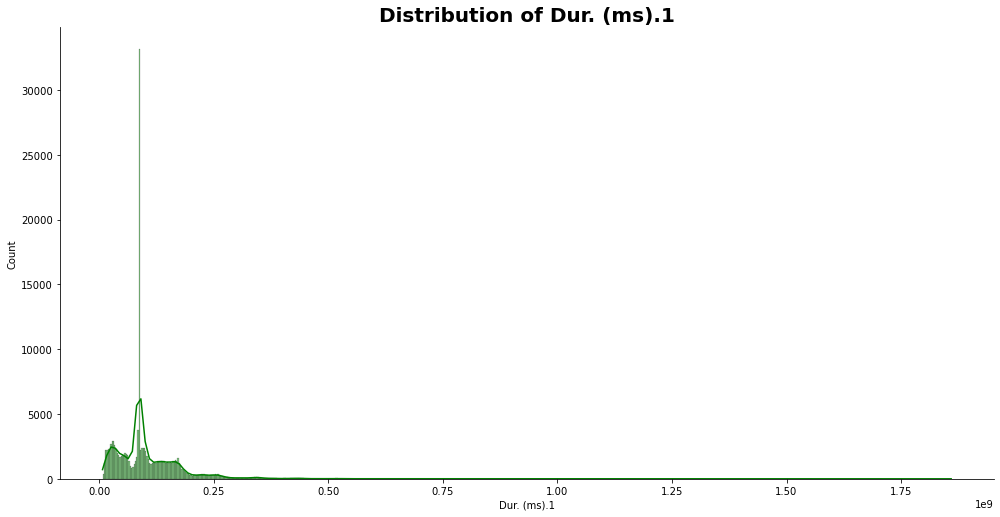

In [17]:
ploting.hist(user_app_behaviour, 'Dur. (ms).1','green') 

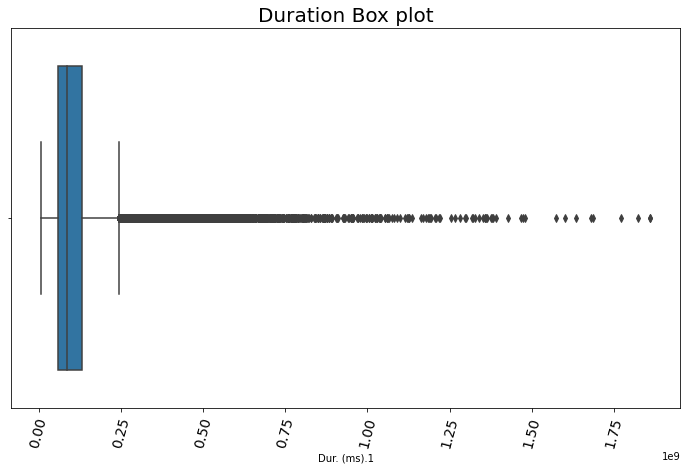

In [200]:
ploting.plot_box(user_app_behaviour, 'Dur. (ms).1', 'Duration Box plot')

<Figure size 648x504 with 0 Axes>

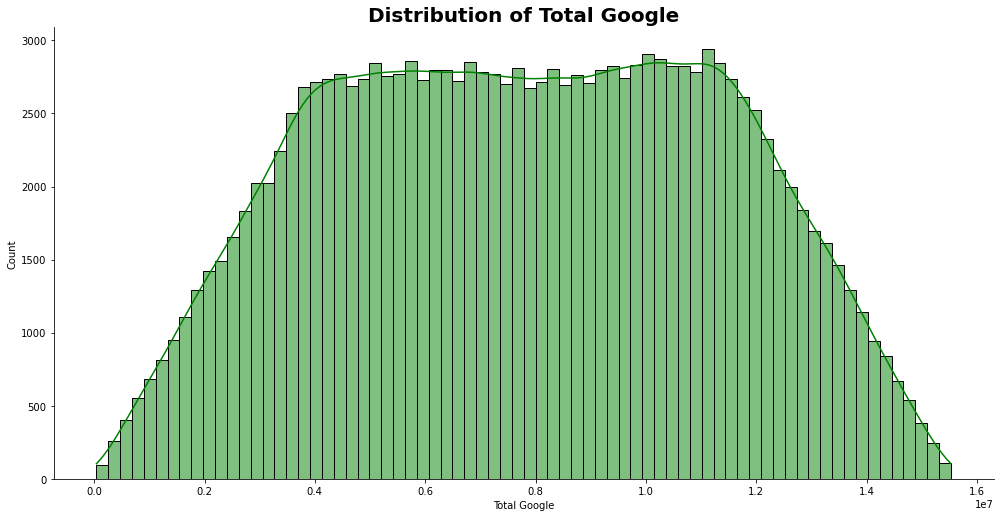

In [201]:
ploting.hist(user_app_behaviour, 'Total Google', 'green')

<Figure size 648x504 with 0 Axes>

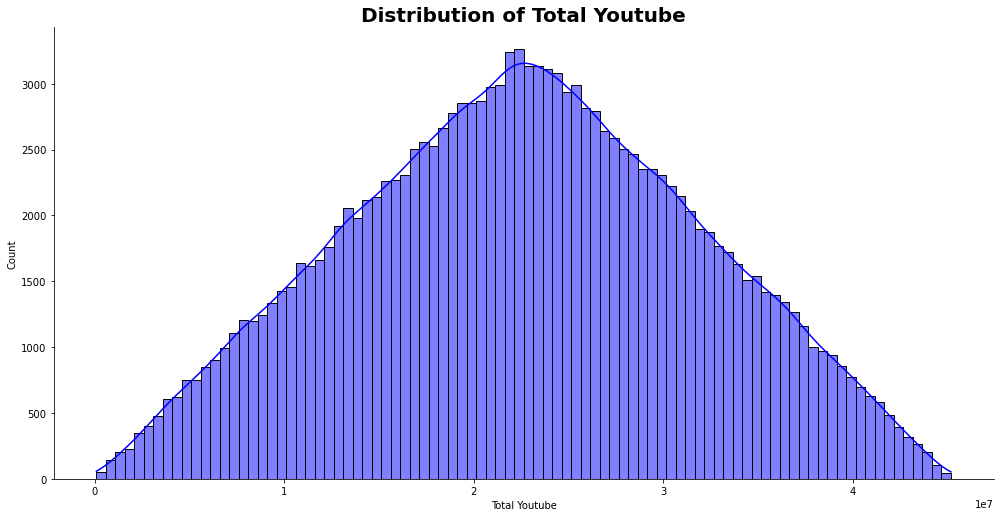

In [202]:
ploting.hist(user_app_behaviour, 'Total Youtube', 'blue')

<Figure size 648x504 with 0 Axes>

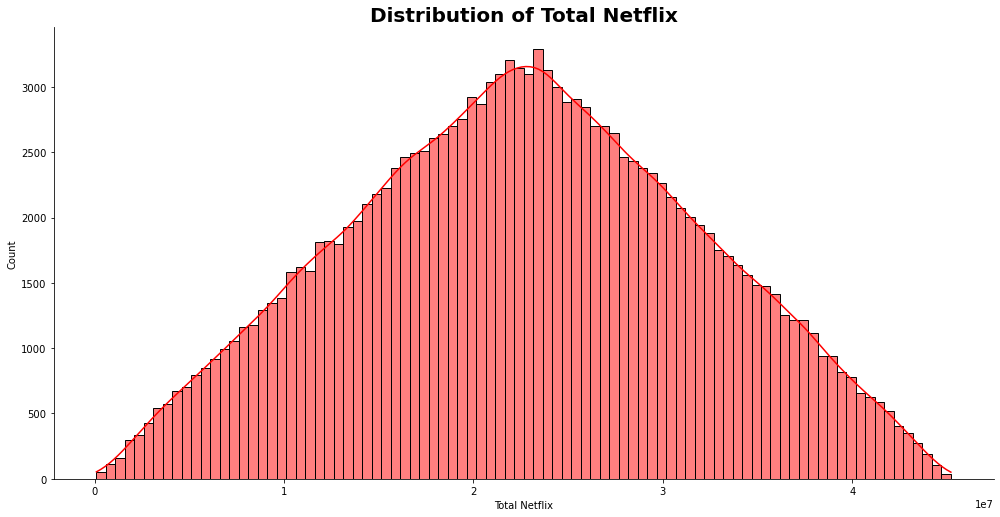

In [203]:
ploting.hist(user_app_behaviour, 'Total Netflix', 'red')

<Figure size 648x504 with 0 Axes>

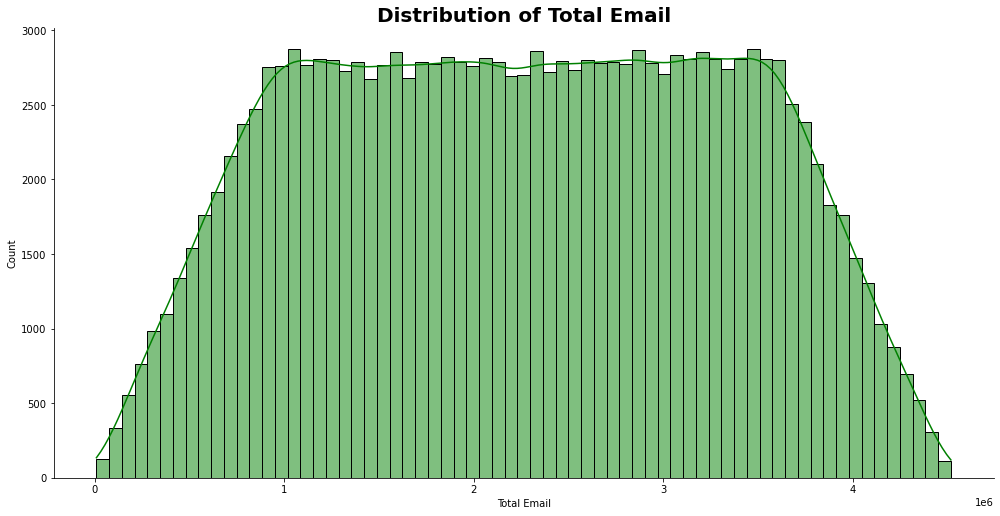

In [204]:
ploting.hist(user_app_behaviour, 'Total Email', 'green')

<Figure size 648x504 with 0 Axes>

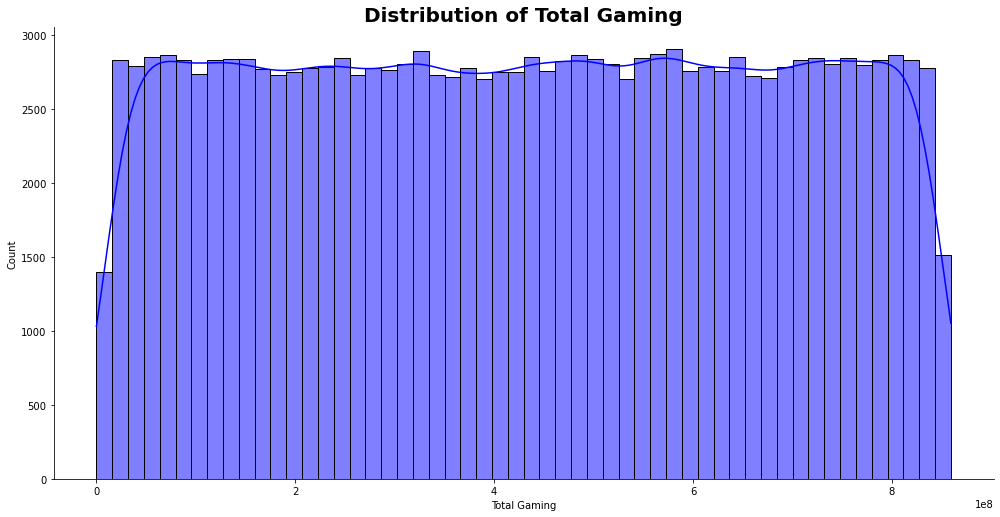

In [205]:
ploting.hist(user_app_behaviour, 'Total Gaming', 'blue')

<Figure size 648x504 with 0 Axes>

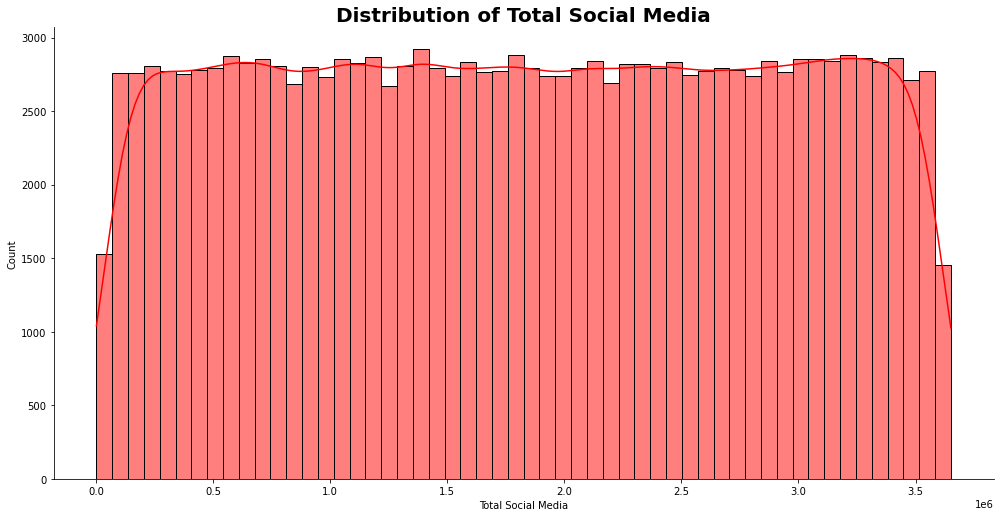

In [206]:
ploting.hist(user_app_behaviour, 'Total Social Media', 'red')

Bivariate Analysis – explore the relationship between each application & the total DL+UL data 

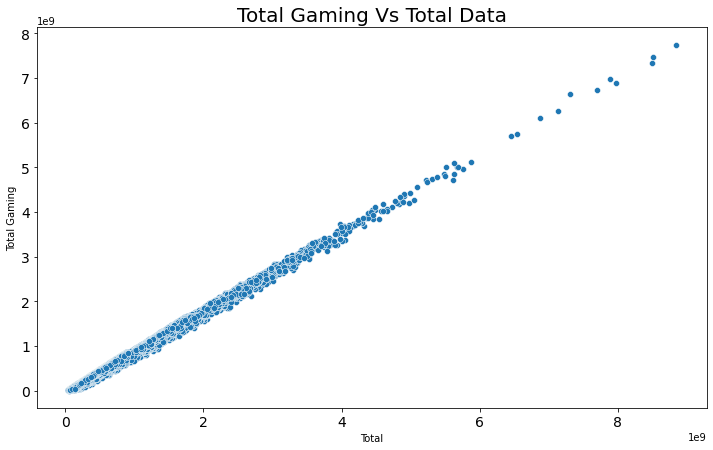

In [207]:
per_user = user_app_behaviour.groupby('MSISDN/Number').sum()
ploting.plot_scatter(per_user, 'Total', 'Total Gaming', 'Total Gaming Vs Total Data', None, None)

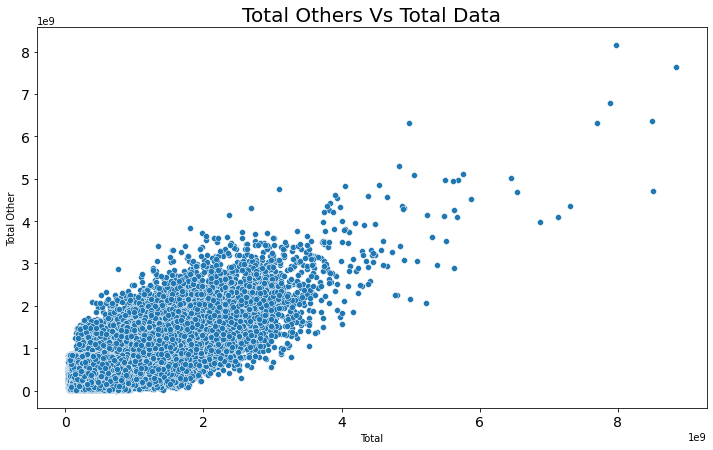

In [208]:
ploting.plot_scatter(per_user, 'Total', 'Total Other', 'Total Others Vs Total Data', None, None)

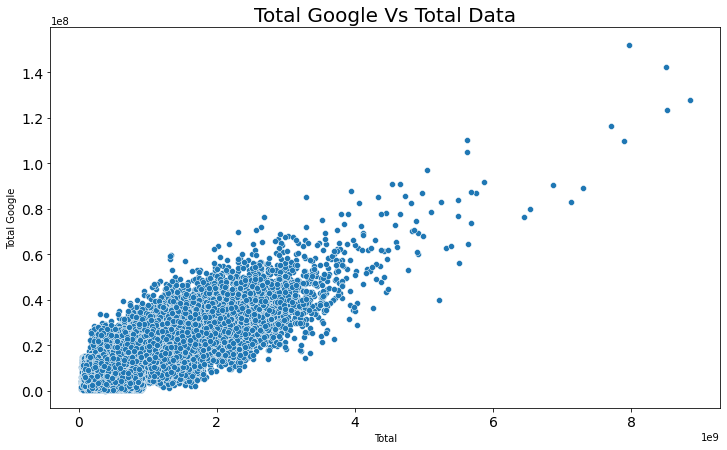

In [209]:
ploting.plot_scatter(per_user, 'Total', 'Total Google', 'Total Google Vs Total Data', None, None)

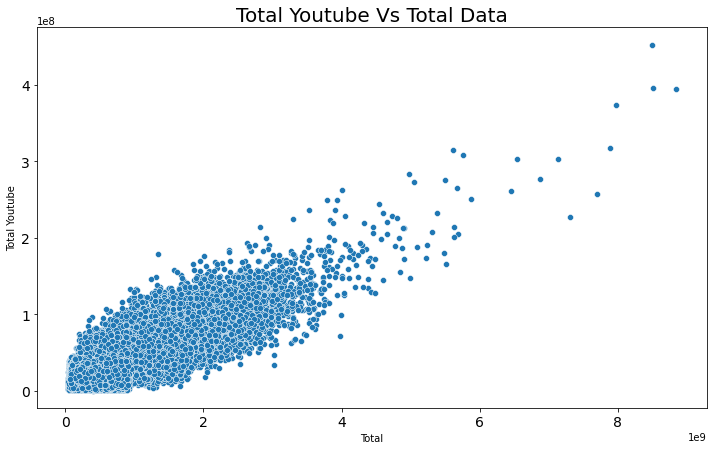

In [210]:
ploting.plot_scatter(per_user, 'Total', 'Total Youtube', 'Total Youtube Vs Total Data', None, None)

In [211]:
per_user

,Bearer Id,Dur. (ms).1,Total Google,Total Youtube,Total Netflix,Total Email,Total Gaming,Total Social Media,Total Other,Total
MSISDN/Number,,,,,,,,,,
"33,601,001,722.00","13,114,483,554,762,799,104.00","116,720,140.00","4,389,005.00","21,624,548.00","27,180,981.00","1,331,362.00","812,458,661.00","2,232,135.00","386,570,872.00","878,690,574.00"
"33,601,001,754.00","7,349,883,260,786,089,984.00","181,230,963.00","5,334,863.00","12,432,223.00","11,221,763.00","3,307,781.00","119,750,078.00","2,660,565.00","281,710,071.00","156,859,643.00"
"33,601,002,511.00","7,349,883,263,388,680,192.00","134,969,374.00","3,443,126.00","21,333,570.00","19,353,900.00","3,205,380.00","538,827,713.00","3,195,623.00","501,693,672.00","595,966,483.00"
"33,601,007,832.00","13,042,425,972,781,099,008.00","49,878,024.00","9,678,493.00","6,977,321.00","1,942,092.00","2,284,670.00","391,126,127.00","280,294.00","35,279,702.00","422,320,698.00"
"33,601,008,617.00","14,627,708,905,718,919,168.00","37,104,453.00","18,499,616.00","41,533,002.00","49,201,724.00","3,305,469.00","1,314,797,820.00","2,912,542.00","804,804,484.00","1,457,410,944.00"
...,...,...,...,...,...,...,...,...,...,...
"33,789,996,170.00","13,042,425,959,639,599,104.00","8,810,688.00","7,531,269.00","26,647,843.00","14,902,538.00","1,006,915.00","660,361,359.00","300,183.00","295,282,817.00","714,641,641.00"
"33,789,997,247.00","13,114,483,558,421,200,896.00","140,988,659.00","5,429,705.00","19,851,572.00","8,531,060.00","2,514,097.00","437,003,292.00","498,569.00","211,115,113.00","480,307,335.00"
"3,197,020,876,596.00","7,277,825,624,788,950,016.00","877,385,325.00","10,438,660.00","11,959,905.00","26,592,300.00","1,520,771.00","178,048,738.00","715,224.00","470,526,473.00","232,123,971.00"


Correlation Analysis – compute a correlation matrix for Social Media data, Google data, Email data, Youtube data, Netflix data, Gaming data, Other data 


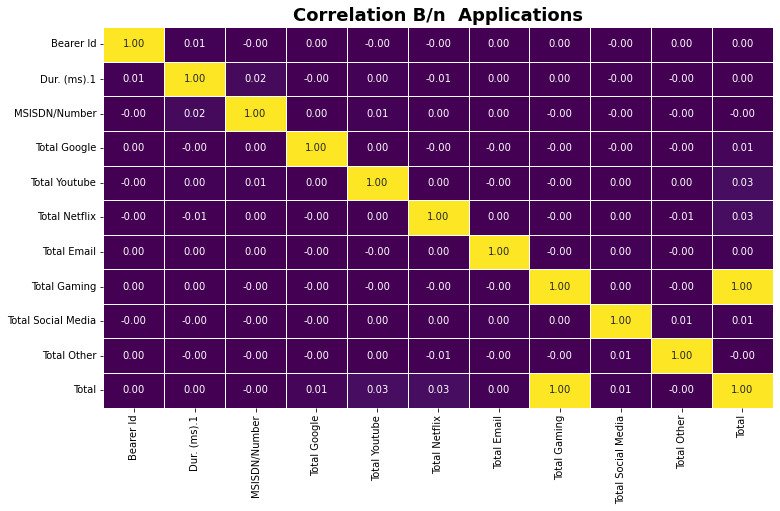

In [212]:
correlation = user_app_behaviour.corr()
ploting.plot_heatmap(correlation, 'Correlation B/n  Applications')

Variable transformations – segment the users into top five decile classes based on the total duration for all sessions

In [213]:
per_user['Decile'] = pd.qcut(per_user['Dur. (ms).1'], 5, labels = False)
per_user.head()

,Bearer Id,Dur. (ms).1,Total Google,Total Youtube,Total Netflix,Total Email,Total Gaming,Total Social Media,Total Other,Total,Decile
MSISDN/Number,,,,,,,,,,,
"33,601,001,722.00","13,114,483,554,762,799,104.00","116,720,140.00","4,389,005.00","21,624,548.00","27,180,981.00","1,331,362.00","812,458,661.00","2,232,135.00","386,570,872.00","878,690,574.00",2
"33,601,001,754.00","7,349,883,260,786,089,984.00","181,230,963.00","5,334,863.00","12,432,223.00","11,221,763.00","3,307,781.00","119,750,078.00","2,660,565.00","281,710,071.00","156,859,643.00",3
"33,601,002,511.00","7,349,883,263,388,680,192.00","134,969,374.00","3,443,126.00","21,333,570.00","19,353,900.00","3,205,380.00","538,827,713.00","3,195,623.00","501,693,672.00","595,966,483.00",3
"33,601,007,832.00","13,042,425,972,781,099,008.00","49,878,024.00","9,678,493.00","6,977,321.00","1,942,092.00","2,284,670.00","391,126,127.00","280,294.00","35,279,702.00","422,320,698.00",0
"33,601,008,617.00","14,627,708,905,718,919,168.00","37,104,453.00","18,499,616.00","41,533,002.00","49,201,724.00","3,305,469.00","1,314,797,820.00","2,912,542.00","804,804,484.00","1,457,410,944.00",0


Compute the total data (DL+UL) per decile class

In [214]:
decile_data_usage = per_user.groupby('Decile').sum()
filter_columns = total_app_columns[1:]
filter_columns.append('Dur. (ms).1')
decile_data_usage[filter_columns]

,Total Google,Total Youtube,Total Netflix,Total Email,Total Gaming,Total Social Media,Total Other,Total,Dur. (ms).1
Decile,,,,,,,,,
0,"181,129,667,623.00","524,620,530,456.00","527,205,923,764.00","52,525,076,389.00","10,010,339,898,089.00","42,578,772,802.00","9,915,185,541,379.00","11,529,809,163,943.00","649,849,851,113.00"
1,"185,920,562,138.00","539,149,263,676.00","537,959,082,249.00","53,459,906,808.00","10,226,035,438,507.00","43,251,861,914.00","10,218,649,317,319.00","11,782,368,894,813.00","1,684,389,295,917.00"
2,"192,753,380,265.00","558,285,501,376.00","559,178,839,109.00","55,817,731,361.00","10,649,917,865,871.00","45,074,510,790.00","10,706,583,058,488.00","12,265,584,703,748.00","2,250,654,856,754.00"
3,"219,062,828,651.00","635,640,855,302.00","633,327,385,395.00","63,428,822,493.00","12,096,731,729,061.00","51,647,215,007.00","12,011,891,291,459.00","13,931,724,616,345.00","3,442,556,107,345.00"
4,"380,677,748,040.00","1,104,841,469,255.00","1,102,892,440,255.00","110,271,463,097.00","20,927,099,800,138.00","88,926,437,590.00","20,918,417,117,378.00","24,117,322,934,511.00","7,578,243,584,973.00"


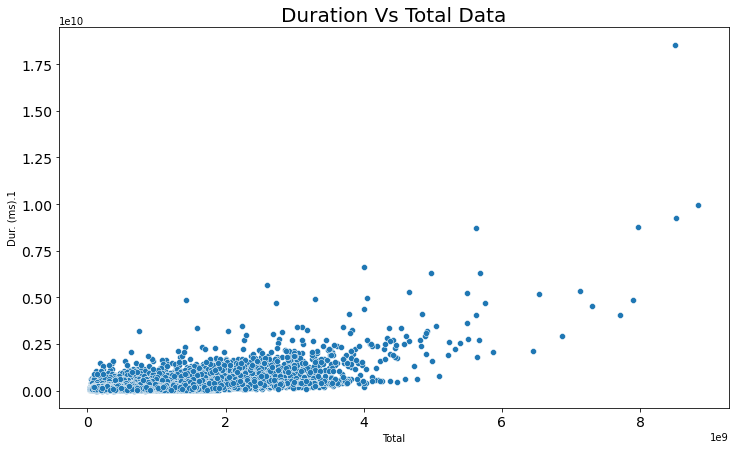

In [215]:
ploting.plot_scatter(per_user, 'Total', 'Dur. (ms).1', 'Duration Vs Total Data', None, None)

Dimensionality Reduction – perform a principal component analysis to reduce the dimensions of data  


In [216]:
pca_scaled = StandardScaler().fit_transform(X=per_user)
pca = PCA(n_components=4)
pca.fit(pca_scaled)
score = pca.transform(pca_scaled)


principalDf = pd.DataFrame(data = score
             , columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4'])
principalDf.head()

,PC 1,PC 2,PC 3,PC 4
0,-0.73,-0.06,-1.10,-0.05
1,-1.72,1.37,0.46,-0.00
2,-0.81,0.76,-0.34,-0.38
3,-2.48,-0.77,-0.27,0.78
4,1.54,-2.29,-1.01,0.16


In [217]:
pca.explained_variance_

array([7.16404541, 0.93833109, 0.65061523, 0.41269441])

End of Market Analysis Code

## Task 2 - User Engagement analysis

Track the user’s engagement using the following engagement metrics: 
1. sessions frequency 
2. the duration of the session 
3. the sessions total traffic (download and upload (bytes))


### Task 2.1-

#### Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric 

In [47]:
df_task2 = df_clean.copy()
df_task2['Total'] = df_task2['Total UL (Bytes)'] + df_task2['Total DL (Bytes)']
df_task2 = df_task2.groupby('MSISDN/Number')\
    .agg({"Bearer Id": "count", 'Dur. (ms).1':'sum', 'Total':'sum'})

df_task2.head()

,Bearer Id,Dur. (ms).1,Total
MSISDN/Number,,,
"33,601,001,722.00",1,"116,720,140.00","878,690,574.00"
"33,601,001,754.00",1,"181,230,963.00","156,859,643.00"
"33,601,002,511.00",1,"134,969,374.00","595,966,483.00"
"33,601,007,832.00",1,"49,878,024.00","422,320,698.00"
"33,601,008,617.00",2,"37,104,453.00","1,457,410,944.00"


In [48]:
### Top 10 Beaerer id
df_task2.sort_values(by='Bearer Id', ascending=False).head(10)

,Bearer Id,Dur. (ms).1,Total
MSISDN/Number,,,
"33,626,320,676.00",18,"8,791,936,680.00","7,971,167,261.00"
"33,614,892,860.00",17,"9,966,905,758.00","8,846,226,494.00"
"33,625,779,332.00",17,"18,553,763,486.00","8,499,620,722.00"
"33,659,725,664.00",16,"4,035,436,251.00","7,705,862,783.00"
"33,760,536,639.00",15,"9,279,442,000.00","8,514,773,963.00"
"33,675,877,202.00",15,"4,865,953,827.00","7,891,110,608.00"
"33,667,163,239.00",13,"8,744,922,020.00","5,618,394,054.00"
"33,604,515,716.00",12,"5,207,995,411.00","5,487,855,293.00"
"33,760,413,819.00",12,"5,321,673,794.00","7,132,370,514.00"


In [49]:
### Top 10 Duration
df_task2.sort_values(by='Dur. (ms).1', ascending=False).head(10)

,Bearer Id,Dur. (ms).1,Total
MSISDN/Number,,,
"33,625,779,332.00",17,"18,553,763,486.00","8,499,620,722.00"
"33,614,892,860.00",17,"9,966,905,758.00","8,846,226,494.00"
"33,760,536,639.00",15,"9,279,442,000.00","8,514,773,963.00"
"33,626,320,676.00",18,"8,791,936,680.00","7,971,167,261.00"
"33,667,163,239.00",13,"8,744,922,020.00","5,618,394,054.00"
"33,662,840,755.00",9,"6,614,274,287.00","4,000,097,981.00"
"33,664,693,736.00",9,"6,288,735,771.00","5,682,007,334.00"
"33,603,127,838.00",12,"6,287,767,483.00","4,976,195,043.00"
"33,667,456,716.00",6,"5,649,885,358.00","2,600,521,941.00"


In [50]:
df_task2.sort_values(by='Total', ascending=False).head(10)

,Bearer Id,Dur. (ms).1,Total
MSISDN/Number,,,
"33,614,892,860.00",17,"9,966,905,758.00","8,846,226,494.00"
"33,760,536,639.00",15,"9,279,442,000.00","8,514,773,963.00"
"33,625,779,332.00",17,"18,553,763,486.00","8,499,620,722.00"
"33,626,320,676.00",18,"8,791,936,680.00","7,971,167,261.00"
"33,675,877,202.00",15,"4,865,953,827.00","7,891,110,608.00"
"33,659,725,664.00",16,"4,035,436,251.00","7,705,862,783.00"
"33,666,464,084.00",11,"4,536,763,706.00","7,308,500,938.00"
"33,760,413,819.00",12,"5,321,673,794.00","7,132,370,514.00"
"33,664,712,899.00",11,"2,927,790,274.00","6,872,018,208.00"


#### Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement. 

In [51]:
min_max_scaler = preprocessing.MinMaxScaler()
df_values = df_task2.values

scalled_values = min_max_scaler.fit_transform(df_values)
df_normalized = pd.DataFrame(data=scalled_values, columns=df_task2.columns)


kmeans = KMeans(n_clusters=3).fit(df_normalized)

In [52]:
print(kmeans.cluster_centers_)

[[0.00247574 0.00540041 0.0524537 ]
 [0.19123448 0.03035409 0.25516341]
 [0.06920623 0.01114335 0.12391076]]


#### Compute the minimum, maximum, average & total non- normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.

In [53]:
cluster = kmeans.predict(df_normalized)
engagement_df = df_task2.copy()
engagement_df['cluster-engagement']  = cluster


In [54]:
cluster_group_df = engagement_df.groupby('cluster-engagement')
cluster_0 = cluster_group_df.get_group(0)
cluster_1 = cluster_group_df.get_group(1)
cluster_2 = cluster_group_df.get_group(2)

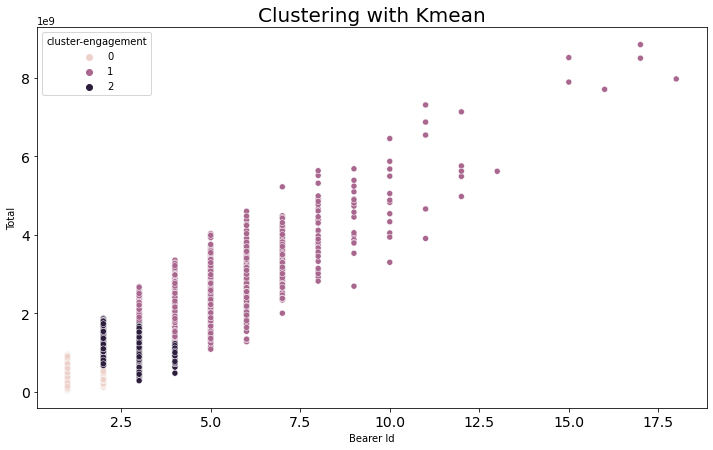

In [55]:
# Cluster 0
plot_scatter(engagement_df,"Bearer Id", "Total","Clustering with Kmean", "cluster-engagement", "")

In [56]:
# cluster 0
cluster_0.describe()

,Bearer Id,Dur. (ms).1,Total,cluster-engagement
count,"80,809.00","80,809.00","80,809.00","80,809.00"
mean,1.04,"107,329,642.62","495,560,528.13",0.00
std,0.20,"78,565,220.07","240,191,076.94",0.00
min,1.00,"7,142,988.00","33,249,009.00",0.00
25%,1.00,"56,524,945.00","292,153,799.00",0.00
50%,1.00,"86,408,081.00","497,148,653.00",0.00
75%,1.00,"142,389,789.00","698,545,952.00",0.00
max,2.00,"1,573,420,996.00","950,760,661.00",0.00


In [57]:
# cluster 1
cluster_1.describe()

,Bearer Id,Dur. (ms).1,Total,cluster-engagement
count,"4,054.00","4,054.00","4,054.00","4,054.00"
mean,4.25,"570,170,073.46","2,282,235,097.89",1.00
std,1.23,"666,605,538.26","653,056,177.84",0.00
min,3.00,"46,899,075.00","1,085,993,876.00",1.00
25%,4.00,"334,922,725.75","1,885,759,031.75",1.00
50%,4.00,"422,926,095.50","2,137,620,052.00",1.00
75%,5.00,"535,446,712.50","2,540,772,700.00",1.00
max,18.00,"18,553,763,486.00","8,846,226,494.00",1.00


In [58]:
# cluster 2
cluster_2.describe()

,Bearer Id,Dur. (ms).1,Total,cluster-engagement
count,"21,608.00","21,608.00","21,608.00","21,608.00"
mean,2.18,"213,857,049.59","1,125,919,960.61",2.00
std,0.41,"145,317,331.13","296,051,999.90",0.00
min,2.00,"18,235,797.00","284,218,230.00",2.00
25%,2.00,"116,302,490.25","893,094,600.75",2.00
50%,2.00,"181,756,398.50","1,099,991,316.50",2.00
75%,2.00,"268,038,527.25","1,345,636,884.25",2.00
max,4.00,"3,174,824,601.00","1,873,330,284.00",2.00


#### Aggregate user total traffic per application and derive the top 10 most engaged users per application

In [59]:
# total trafic, Application, user -> top to users
engagement = user_behaviour.reset_index().copy()

# Social Media engagement
engagement[['MSISDN/Number','Total Social Media']].sort_values(by='Total Social Media',ascending=False).head(5)

,MSISDN/Number,Total Social Media
13467,"33,626,320,676.00","43,374,779.00"
92584,"33,760,536,639.00","39,783,189.00"
36909,"33,659,725,664.00","35,412,358.00"
6404,"33,614,892,860.00","28,294,544.00"
13123,"33,625,779,332.00","27,135,500.00"


In [60]:
# Google Engagement
engagement[['MSISDN/Number','Total Google']].sort_values(by='Total Google',ascending=False).head(5)

,MSISDN/Number,Total Google
13467,"33,626,320,676.00","152,191,852.00"
13123,"33,625,779,332.00","142,307,915.00"
6404,"33,614,892,860.00","127,973,787.00"
92584,"33,760,536,639.00","123,223,099.00"
36909,"33,659,725,664.00","116,516,345.00"


In [61]:
engagement[['MSISDN/Number','Total Gaming']].sort_values(by='Total Gaming',ascending=False).head(5)

,MSISDN/Number,Total Gaming
6404,"33,614,892,860.00","7,749,432,234.00"
92584,"33,760,536,639.00","7,461,045,228.00"
13123,"33,625,779,332.00","7,326,673,487.00"
76077,"33,675,877,202.00","6,970,567,597.00"
13467,"33,626,320,676.00","6,887,572,116.00"


#### Plot the top 3 most used applications using appropriate charts.

In [62]:
data = []

# Remove 'MSISDN/Number' and 'Total' from columns list
columns = user_behaviour.columns.tolist()[1:-1]

for column in columns:
    data.append(user_behaviour[column].sum())

data_df = pd.DataFrame({"Application": columns, "counts":data})

data_df.sort_values(by='counts', ascending=False)[:3]

,Application,counts
3,Total Gaming,"63,910,124,731,666.00"
4,Total Other,"63,770,726,326,023.00"
1,Total Youtube,"3,362,537,620,065.00"


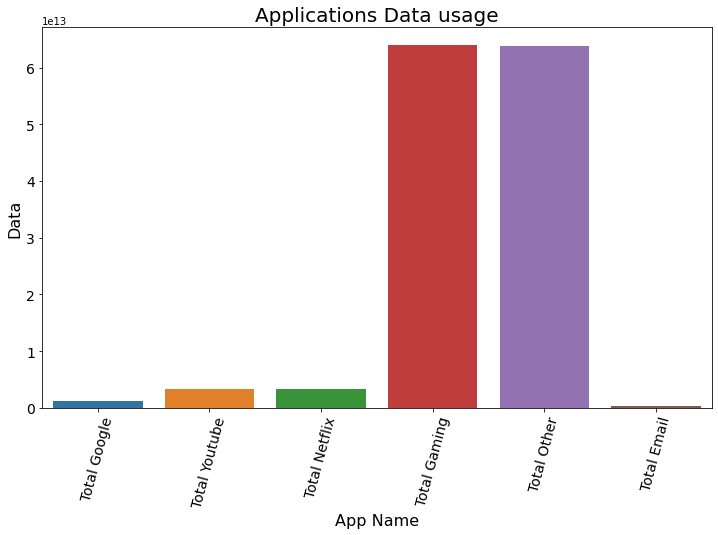

In [63]:
plot_bar(data_df,data_df['Application'], data_df['counts'], "Applications Data usage", "App Name", "Data")

#### Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics: 
1. What is the optimized value of k (use elbow method for this)?  
2. Interpret your findings.


In [64]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_normalized)
    distortions.append(kmeanModel.inertia_)

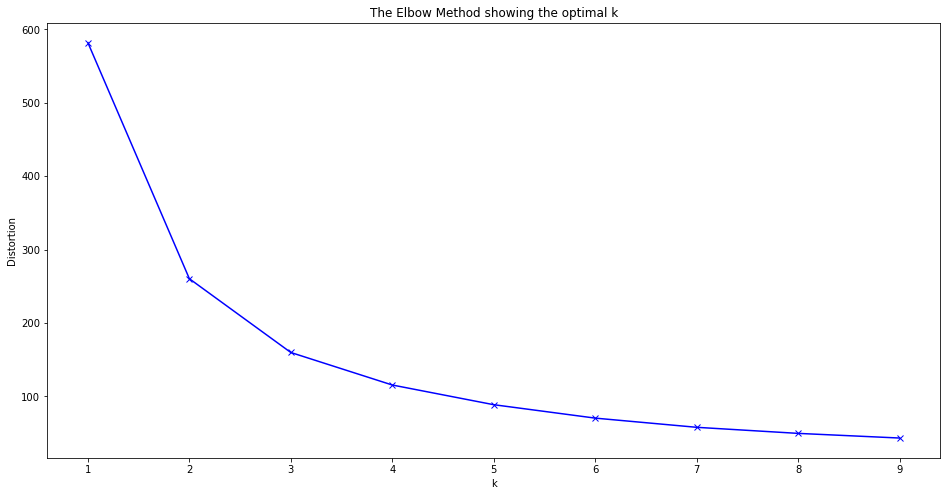

In [65]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [66]:
### so Number 3 is the optimum, and we should run with 3 cluster
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_normalized)

cluster = kmeans.predict(df_normalized)
cluster_df = df_task2.copy()
cluster_df['cluster']  = cluster
cluster_df['cluster']

MSISDN/Number
33,601,001,722.00         0
33,601,001,754.00         0
33,601,002,511.00         0
33,601,007,832.00         0
33,601,008,617.00         2
                         ..
33,789,996,170.00         0
33,789,997,247.00         0
3,197,020,876,596.00      0
337,000,037,000,919.00    0
882,397,108,489,451.00    0
Name: cluster, Length: 106471, dtype: int32

# Task 3

Aggregate, per customer, the following information (treat missing & outliers by replacing by the mean or the mode of the corresponding variable):
1. Average TCP retransmission
2. Average RTT
3. Handset type
4. Average throughput


### How much of the data is Null ? 

In [67]:
def null_percentage(df):
    number_of_rows, number_of_columns = df.shape
    df_size = number_of_rows * number_of_columns
    
    null_size = (df.isnull().sum()).sum()
    percentage = round((null_size / df_size) * 100, 2)
    print(f"Data Fraame contain null values of { percentage }%")

null_percentage(df)

Data Fraame contain null values of 0.27%


In [68]:
'''
TCP DL Retrans. Vol (Bytes)
TCP UL Retrans. Vol (Bytes)

Avg RTT DL (ms)
Avg RTT UL (ms)

Handset type

Avg Bearer TP DL (kbps)
Avg Bearer TP UL (kbps)

'''
#Read the cleaned csv file and store it on data
file_name = 'Week1_challenge_data_source.csv'
df_task_3 = file.read_csv(file_name)
new_netwok_df = df_task_3[['MSISDN/Number', 'Handset Type','TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',\
                         'Avg RTT DL (ms)', 'Avg RTT UL (ms)',\
                         'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']]


null_percentage(new_netwok_df)
new_netwok_df.isnull().sum()
#new_netwok_df = data.copy()
#new_netwok_df.info()
#new_netwok_df['Total TCP Retrans'] = new_netwok_df['TCP DL Retrans. Vol (Bytes)'] +new_netwok_df['TCP UL Retrans. Vol (Bytes)']
#new_netwok_df['Total Throughput'] = new_netwok_df['Avg Bearer TP DL (kbps)'] + new_netwok_df['Avg Bearer TP DL (kbps)']

#new_netwok_df['Total RTT'] = new_netwok_df['Avg RTT DL (ms)'] + new_netwok_df['Avg RTT UL (ms)']

#new_netwok_df.head()

Data Fraame contain null values of 20.92%


MSISDN/Number                   1066
Handset Type                    9559
TCP DL Retrans. Vol (Bytes)    88146
TCP UL Retrans. Vol (Bytes)    96649
Avg RTT DL (ms)                27829
Avg RTT UL (ms)                27812
Avg Bearer TP DL (kbps)            1
Avg Bearer TP UL (kbps)            1
dtype: int64

In [69]:
## Fill Mising Values
for col in new_netwok_df.columns:
    if(new_netwok_df[col].isnull().sum()):
        new_netwok_df[col] = new_netwok_df[col].fillna(new_netwok_df[col].mode()[0])

In [70]:
null_percentage(new_netwok_df)
new_netwok_df.isnull().sum()

Data Fraame contain null values of 0.0%


MSISDN/Number                  0
Handset Type                   0
TCP DL Retrans. Vol (Bytes)    0
TCP UL Retrans. Vol (Bytes)    0
Avg RTT DL (ms)                0
Avg RTT UL (ms)                0
Avg Bearer TP DL (kbps)        0
Avg Bearer TP UL (kbps)        0
dtype: int64

In [71]:
new_netwok_df['Total TCP Retrans'] = new_netwok_df['TCP DL Retrans. Vol (Bytes)'] +\
    new_netwok_df['TCP UL Retrans. Vol (Bytes)']
new_netwok_df['Total Throughput'] = new_netwok_df['Avg Bearer TP DL (kbps)'] +\
    new_netwok_df['Avg Bearer TP DL (kbps)']

new_netwok_df['Total RTT'] = new_netwok_df['Avg RTT DL (ms)'] + new_netwok_df['Avg RTT UL (ms)']

new_netwok_df.head()


,MSISDN/Number,Handset Type,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Total TCP Retrans,Total Throughput,Total RTT
0,"33,664,962,239.00",Samsung Galaxy A5 Sm-A520F,"1,330.00","1,330.00",42.00,5.00,23.00,44.00,"2,660.00",46.00,47.00
1,"33,681,854,413.00",Samsung Galaxy J5 (Sm-J530),"1,330.00","1,330.00",65.00,5.00,16.00,26.00,"2,660.00",32.00,70.00
2,"33,760,627,129.00",Samsung Galaxy A8 (2018),"1,330.00","1,330.00",28.00,5.00,6.00,9.00,"2,660.00",12.00,33.00
3,"33,750,343,200.00",Huawei B528S-23A,"1,330.00","1,330.00",28.00,5.00,44.00,44.00,"2,660.00",88.00,33.00
4,"33,699,795,932.00",Samsung Sm-G390F,"1,330.00","1,330.00",28.00,5.00,6.00,9.00,"2,660.00",12.00,33.00


In [72]:
aggregate = {'Handset Type':'first','Total TCP Retrans':'sum', 'Total Throughput':'sum', 'Total RTT':'sum'}
columns = ['MSISDN/Number','Bearer Id','Handset Type', 'Total TCP Retrans', 'Total Throughput', 'Total RTT']
network_per_user_df = new_netwok_df.groupby('MSISDN/Number').agg(aggregate).reset_index()
network_per_user_df.head()

,MSISDN/Number,Handset Type,Total TCP Retrans,Total Throughput,Total RTT
0,"33,601,001,722.00",Huawei P20 Lite Huawei Nova 3E,"2,660.00",74.00,46.00
1,"33,601,001,754.00",Apple iPhone 7 (A1778),"2,660.00",96.00,31.00
2,"33,601,002,511.00",Huawei B528S-23A,"2,660.00",96.00,33.00
3,"33,601,007,832.00",Apple iPhone 5S (A1457),"2,396.00",408.00,84.00
4,"33,601,008,617.00",Apple iPhone Se (A1723),"9,373,492.00","80,790.00",119.00


Compute & list 10 of the top, bottom and most frequent:
1. TCP values in the dataset. 
2. RTT values in the dataset.
3. Throughput values in the dataset.


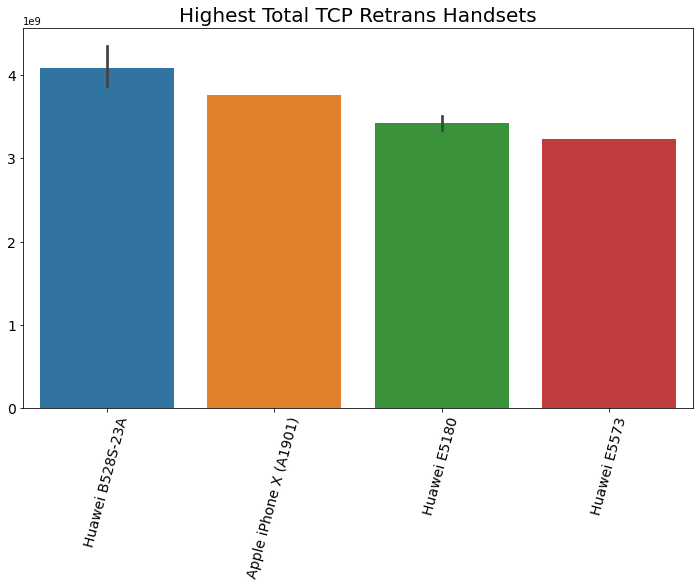

In [73]:
# top 5
result = network_per_user_df.sort_values(by='Total TCP Retrans', ascending=False)[:100]
plot_bar(result, result['Handset Type'], result['Total TCP Retrans'], 'Highest Total TCP Retrans Handsets','','')

In [74]:
# Bottom 5
network_per_user_df.sort_values(by='Total TCP Retrans', ascending=True)[:5]

,MSISDN/Number,Handset Type,Total TCP Retrans,Total Throughput,Total RTT
23472,"33,650,128,412.00",Apple iPhone 5S (A1457),97.00,"60,460.00",48.00
6359,"33,614,777,138.00",Huawei Ascend Mate7,128.00,"16,996.00",64.00
96977,"33,762,062,356.00",Apple iPhone 8 (A1905),129.00,"63,080.00",41.00
13546,"33,626,357,513.00",Apple iPhone 7 (A1778),134.00,"20,256.00",40.00
2177,"33,607,833,304.00",Apple iPhone 5C (A1529),143.00,"32,484.00",32.00


In [75]:
# most frequent
network_per_user_df['Total TCP Retrans'].value_counts().head(5)

2,660.00     47449
5,320.00      7662
7,980.00      1108
2,624.00       363
10,640.00      293
Name: Total TCP Retrans, dtype: int64

Compute & report:
1. The distribution of the average throughput  per handset type and provide interpretation for your findings.
2. The average TCP retransmission view per handset type and provide interpretation for your findings.

In [76]:
handset_throughput = network_per_user_df.groupby('Handset Type').agg({'Total Throughput': 'sum'}).reset_index()
handset_throughput.sort_values(by='Total Throughput', ascending=False).head(5)

## Huawi is leading but apple is follwoing closely

,Handset Type,Total Throughput
316,Huawei B528S-23A,"1,635,829,034.00"
59,Apple iPhone 7 (A1778),"135,674,378.00"
53,Apple iPhone 6S (A1688),"130,004,954.00"
49,Apple iPhone 6 (A1586),"118,531,110.00"
953,Samsung Galaxy S8 (Sm-G950F),"113,334,542.00"


In [77]:
handset_rtt = network_per_user_df.groupby('Handset Type').agg({'Total RTT': 'sum'}).reset_index()
handset_rtt.sort_values(by='Total RTT', ascending=False).head(5)


### HUawei is leading but apple is following a lot

,Handset Type,Total RTT
316,Huawei B528S-23A,"3,994,572.00"
49,Apple iPhone 6 (A1586),"913,046.00"
53,Apple iPhone 6S (A1688),"730,817.00"
59,Apple iPhone 7 (A1778),"703,139.00"
66,Apple iPhone 8 (A1905),"506,222.00"


**Task 3.4** - Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster. (The description must define each group based on your understanding of the data)


In [78]:
handset= network_per_user_df['Handset Type'].unique()

# catagory = {}
# for index, each in enumerate(handset.tolist()):
#     catagory[each] = index

net_cluster_df = network_per_user_df.copy()
net_cluster_df.drop('Handset Type', axis=1, inplace=True)
net_cluster_df = net_cluster_df.set_index('MSISDN/Number')

net_cluster_df.head()
# new_netwok_df["Handset Type"] = [catagory[x] for x in new_netwok_df["Handset Type"]]

,Total TCP Retrans,Total Throughput,Total RTT
MSISDN/Number,,,
"33,601,001,722.00","2,660.00",74.00,46.00
"33,601,001,754.00","2,660.00",96.00,31.00
"33,601,002,511.00","2,660.00",96.00,33.00
"33,601,007,832.00","2,396.00",408.00,84.00
"33,601,008,617.00","9,373,492.00","80,790.00",119.00


In [79]:
## First normalize the Data, Then Cluster
min_max_scaler = preprocessing.MinMaxScaler()
network_values = net_cluster_df.values

scalled_values = min_max_scaler.fit_transform(network_values)
df_network_normalized = pd.DataFrame(data=scalled_values, columns=df_task2.columns)


kmeans = KMeans(n_clusters=3).fit(df_normalized)

In [80]:
cluster = kmeans.predict(df_network_normalized)
experiance_df = network_per_user_df.copy()
experiance_df['cluster-experiance']  = cluster
experiance_df = experiance_df.set_index('MSISDN/Number')
experiance_df.head()

,Handset Type,Total TCP Retrans,Total Throughput,Total RTT,cluster-experiance
MSISDN/Number,,,,,
"33,601,001,722.00",Huawei P20 Lite Huawei Nova 3E,"2,660.00",74.00,46.00,0
"33,601,001,754.00",Apple iPhone 7 (A1778),"2,660.00",96.00,31.00,0
"33,601,002,511.00",Huawei B528S-23A,"2,660.00",96.00,33.00,0
"33,601,007,832.00",Apple iPhone 5S (A1457),"2,396.00",408.00,84.00,0
"33,601,008,617.00",Apple iPhone Se (A1723),"9,373,492.00","80,790.00",119.00,0


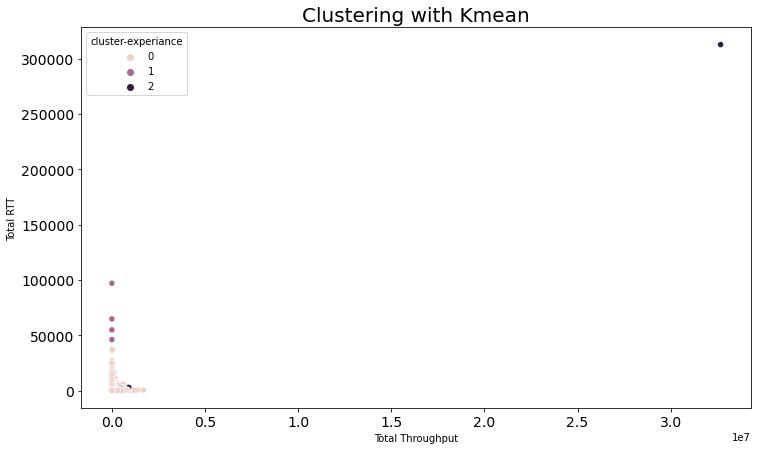

In [81]:
plot_scatter(experiance_df,"Total Throughput", "Total RTT","Clustering with Kmean", "cluster-experiance", "")

In [82]:
experiance_df['cluster-experiance'].value_counts()
## dont' know what kind of description am gonna provide for this 

0    106607
1       183
2        66
Name: cluster-experiance, dtype: int64

## Task 4

1. engagement score to each user. Consider the engagement score as the Euclidean distance between the user data point & the less engaged cluster (use the first clustering for this) 

2. experience score to each user. Consider the experience score as the Euclidean distance between the user data point & the worst experience’s cluster.

In [83]:
## Engagement Score
lowest_engagement = engagement_df.groupby('cluster-engagement').get_group(0).mean()
lowest_engagement

Bearer Id                      1.04
Dur. (ms).1          107,329,642.62
Total                495,560,528.13
cluster-engagement             0.00
dtype: float64

In [86]:
def get_engagement_score(df, lowest):
    x = float(lowest['Bearer Id'])
    y = float(lowest['Dur. (ms).1'])
    z = float(lowest['Total'])
    new_df = df.copy()
    new_df['engagement score'] = ((df['Bearer Id'] - x)**2 + (df['Dur. (ms).1'] - y)**2 + (df['Total'] - z)**2)**0.5
    return new_df
engagement_scored_df = get_engagement_score(engagement_df, lowest_engagement)
engagement_scored_df.head()

,Bearer Id,Dur. (ms).1,Total,cluster-engagement,engagement score
MSISDN/Number,,,,,
"33,601,001,722.00",1,"116,720,140.00","878,690,574.00",0,"383,245,108.89"
"33,601,001,754.00",1,"181,230,963.00","156,859,643.00",0,"346,669,431.51"
"33,601,002,511.00",1,"134,969,374.00","595,966,483.00",0,"104,140,820.64"
"33,601,007,832.00",1,"49,878,024.00","422,320,698.00",0,"93,084,699.06"
"33,601,008,617.00",2,"37,104,453.00","1,457,410,944.00",2,"964,410,597.08"


In [87]:
lowest_experiance = experiance_df.groupby('cluster-experiance').get_group(0).mean()
lowest_experiance

Total TCP Retrans    5,812,494.28
Total Throughput        36,520.28
Total RTT                  148.43
cluster-experiance           0.00
dtype: float64

In [88]:
def get_experiance_score(df, low):
    x = float(low['Total RTT'])
    y = float(low['Total TCP Retrans'])
    z = float(low['Total Throughput'])
    new_df = df.copy()
    new_df['experience score'] = ((df['Total RTT'] - x)**2 + (df['Total TCP Retrans'] - y)**2 \
                              + (df['Total Throughput'] - z)**2 )**0.5
    return new_df
experiance_scored_df = get_experiance_score(experiance_df, lowest_experiance)
experiance_scored_df.head()

,Handset Type,Total TCP Retrans,Total Throughput,Total RTT,cluster-experiance,experience score
MSISDN/Number,,,,,,
"33,601,001,722.00",Huawei P20 Lite Huawei Nova 3E,"2,660.00",74.00,46.00,0,"5,809,948.60"
"33,601,001,754.00",Apple iPhone 7 (A1778),"2,660.00",96.00,31.00,0,"5,809,948.46"
"33,601,002,511.00",Huawei B528S-23A,"2,660.00",96.00,33.00,0,"5,809,948.46"
"33,601,007,832.00",Apple iPhone 5S (A1457),"2,396.00",408.00,84.00,0,"5,810,210.51"
"33,601,008,617.00",Apple iPhone Se (A1723),"9,373,492.00","80,790.00",119.00,0,"3,561,272.88"


Task 4.2 - Consider the average of both engagement & experience scores as  the satisfaction score & report the top 10 satisfied customer 

In [89]:
satisfaction_df = pd.merge(engagement_scored_df["engagement score"], experiance_scored_df['experience score'], on='MSISDN/Number')
satisfaction_df['satisfaction score'] = (satisfaction_df['engagement score'] + satisfaction_df['experience score']) / 2


In [90]:
satisfaction_df.sort_values(by='satisfaction score', ascending=False).head(5)

,engagement score,experience score,satisfaction score
MSISDN/Number,,,
"33,626,320,676.00","11,458,930,814.79","10,469,967,346.82","10,964,449,080.80"
"33,625,779,332.00","20,108,105,358.91","5,477,520.15","10,056,791,439.53"
"33,614,892,860.00","12,920,714,502.24","2,444,244.17","6,461,579,373.20"
"33,760,536,639.00","12,183,407,947.30","28,726,943.38","6,106,067,445.34"
"33,667,725,464.00","1,740,477,563.16","8,348,396,631.43","5,044,437,097.30"


Task 4.3 - Build a regression model of your choice to predict the satisfaction score of a customer. 

In [92]:
    
regretion_df = pd.merge(engagement_df[['Bearer Id', 'Dur. (ms).1', 'Total']],\
                        experiance_df[['Total RTT','Total TCP Retrans', 'Total Throughput']],\
                       on='MSISDN/Number')
regretion_df = pd.merge(regretion_df,satisfaction_df['satisfaction score'], on='MSISDN/Number' )
regretion_df.head()

,Bearer Id,Dur. (ms).1,Total,Total RTT,Total TCP Retrans,Total Throughput,satisfaction score
MSISDN/Number,,,,,,,
"33,601,001,722.00",1,"116,720,140.00","878,690,574.00",46.00,"2,660.00",74.00,"194,527,528.75"
"33,601,001,754.00",1,"181,230,963.00","156,859,643.00",31.00,"2,660.00",96.00,"176,239,689.98"
"33,601,002,511.00",1,"134,969,374.00","595,966,483.00",33.00,"2,660.00",96.00,"54,975,384.55"
"33,601,007,832.00",1,"49,878,024.00","422,320,698.00",84.00,"2,396.00",408.00,"49,447,454.79"
"33,601,008,617.00",2,"37,104,453.00","1,457,410,944.00",119.00,"9,373,492.00","80,790.00","483,985,934.98"


In [93]:
X = regretion_df[['Bearer Id', 'Dur. (ms).1', 'Total','Total RTT','Total TCP Retrans', 'Total Throughput']].values
X = StandardScaler().fit_transform(X)
X.shape

(106471, 6)

In [94]:
y = regretion_df[['satisfaction score']].values
y = StandardScaler().fit_transform(y)
y.shape

(106471, 1)

In [96]:
model = LinearRegression().fit(X, y)
model.score(X, y)

0.8585292842561847

In [97]:
pickle.dump(model, open('../models/satisfaction_model.sav', 'wb'))

Task 4.4 - Run a k-means (k=2) on the engagement & the experience score .

In [98]:
eng_exp_df = satisfaction_df[['engagement score', 'experience score']]

In [99]:
min_max_scaler = preprocessing.MinMaxScaler()
eng_exp_values = eng_exp_df.values

scalled_values = min_max_scaler.fit_transform(eng_exp_values)
eng_exp_normalized = pd.DataFrame(data=scalled_values, columns=eng_exp_df.columns)


kmeans = KMeans(n_clusters=2).fit(eng_exp_normalized)

Task 4.5 - Aggregate the average satisfaction & experience score per cluster. 

In [100]:
eng_exp_df['clusters'] = kmeans.labels_
eng_exp_df['clusters'].value_counts()

1    95663
0    10808
Name: clusters, dtype: int64

In [101]:
result = eng_exp_df.groupby('clusters').mean()
result

,engagement score,experience score
clusters,,
0,"1,338,017,648.66","75,914,114.02"
1,"265,278,550.01","9,827,631.38"


Task 4.6 - Export your final table containing all user id + engagement, experience & satisfaction scores in your local MySQL database. Report a screenshot of a select query output on the exported table. 

In [102]:
satisfaction_df = satisfaction_df.reset_index()
satisfaction_df.head()
satisfaction_df.to_csv('../data/user_satisfaction.csv')